In [95]:
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt
%matplotlib inline

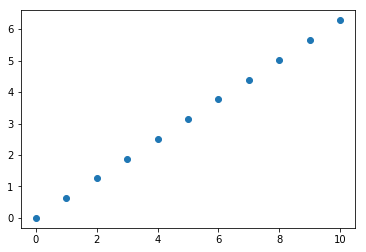

In [41]:
"""Question 2"""
def gen_array_1(n):
    """Generate an array of n values equally spaced over the
    interval [0,2*Pi] using for loop.
    """
    if n < 0:
        return None
    if n == 0:
        return np.array([])
    if n == 1:
        return np.array([0])
    interval = 2 * np.pi / (n - 1)
    array = []
    val = 0
    for i in range(n):
        array.append(val)
        val += interval
    return np.array(array)

def gen_array_2(n):
    """Generate an array of n values equally spaced over the
    interval [0,2*Pi] using numpy's linspace.
    """
    return np.linspace(0, 2*np.pi, n)

def plot_res(n):
    """Plot the values as a function of index number.
    """
    x = np.array([i for i in range(n)])
    y = gen_array_2(n)
    plt.plot(x, y, 'o')
    
plot_res(11)

In [91]:
# Problem 3
# 3a
def scalar_mult(u, c):
    """Compute scaler multiplication of an array and a number.
    Args: an np.array u, a number c
    Returns: an array 
    """
    n = u.shape[0]
    out = np.zeros(n)
    for i in range(n):
        out[i] = u[i] * c
    return out

# 3b
def component_add(a, b):
    """Compute conponent wise addition of two arrays.
    Args: two arrays with same length
    Returns: an numpy array with the same length with input arrays
    """
    n = a.shape[0]
    out = np.zeros(n)
    for i in range(n):
        out[i] = a[i] + b[i]
    return out

# 3c
def linear_function(c, x, d):
    """Evaluate the linear function y = c * x + d
    Args: c,x,d: arrays with the same length
    Returns: the result of the evaluation, an numpy array.
    """
    return component_add(scalar_mult(x, c), d)

# 3d
def component_mult(a, b):
    """Compute the component wise multiplication of two arrays
    Args: two arrays with same length
    Returns: an numpy array
    """
    n = a.shape[0]
    out = np.zeros(n)
    for i in range(n):
        out[i] = a[i] * b[i]
    return out

# 3e
def inner(a, b):
    """Compute the inner product of two arrays
    Args: two arrays with same length
    Returns: a float number
    """
    n = a.shape[0]
    out = 0
    for i in range(n):
        out += a[i] * b[i]
    return out

# 3f
def norm(a):
    """Compute the L2 norm of input array
    Args: an array a
    Return: a float number
    """
    n = a.shape[0]
    out = 0
    for i in range(n):
        out += a[i] * a[i]
    return np.sqrt(out)

In [92]:
norm(np.array([3,2,3]))

4.6904157598234297

In [101]:
# Problem 4
# 4a
@cuda.jit
def scalar_mult_kernel(d_out, d_u, d_c):
    i = cuda.grid(1)
    n = d_u.shape[0]
    if i >= n:
        return 
    d_out = d_u[i] * d_c

def nu_scalar_mult(u, c):
    n = u.shape[0]
    d_u = cuda.to_device(u)
    d_v = cuda.to_device(c)
    d_out = cuda.device_array(n)
    blocks = (n + TPB - 1) // TPB
    threads = TPB
    scalar_mult[blocks, threads](d_out, d_u, d_c)
    return d_out.copy_to_host()

In [97]:
nu_component_mult(np.array([2,3,4]),4)

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBAPRO_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [100]:
!export NUMBA_ENABLE_CUDASIM=1